## Notebook Imports

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from 

## Gathering Data

In [63]:
data = load_boston()

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [64]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['PRICE'] = data.target

In [65]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [67]:
df.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

## EDA

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


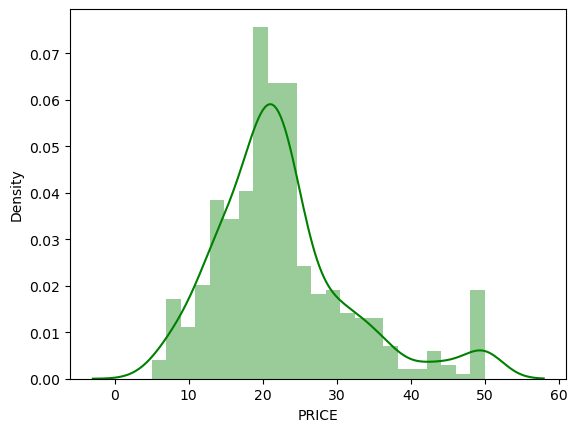

In [14]:
sns.distplot(df['PRICE'], color='green');

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


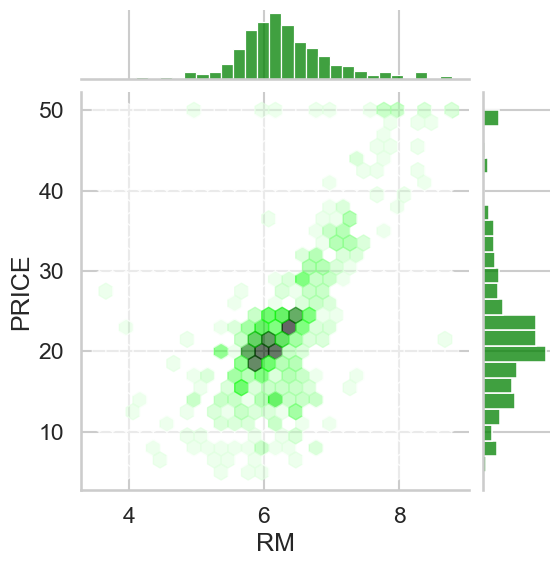

In [21]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(df.RM, df.PRICE, kind='hex', color='green', joint_kws={'alpha':0.6});

Text(0, 0.5, 'Dis - Distance from Employment')

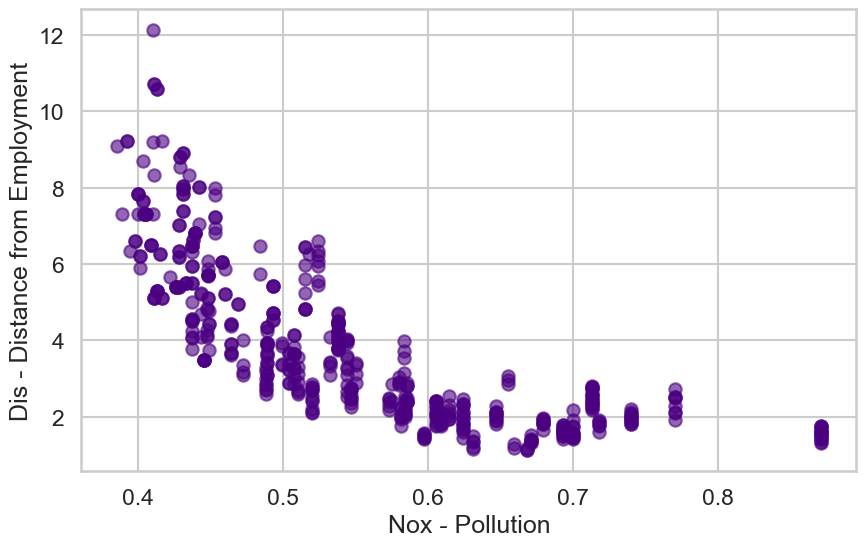

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(df.NOX, df.DIS, s=80, alpha=0.6, color='indigo')
plt.xlabel('Nox - Pollution')
plt.ylabel('Dis - Distance from Employment')

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


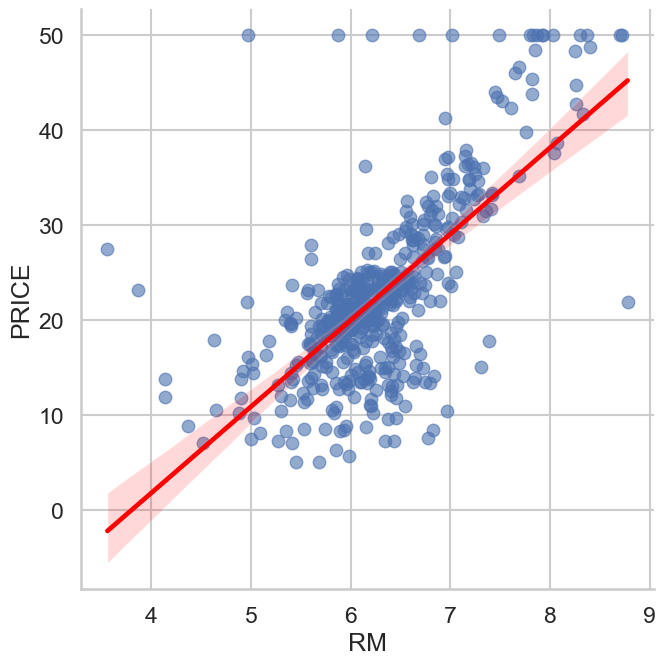

In [25]:
sns.lmplot(x='RM', y='PRICE', data=df, size=7, line_kws={'color':'red'}, scatter_kws={'alpha':0.6});

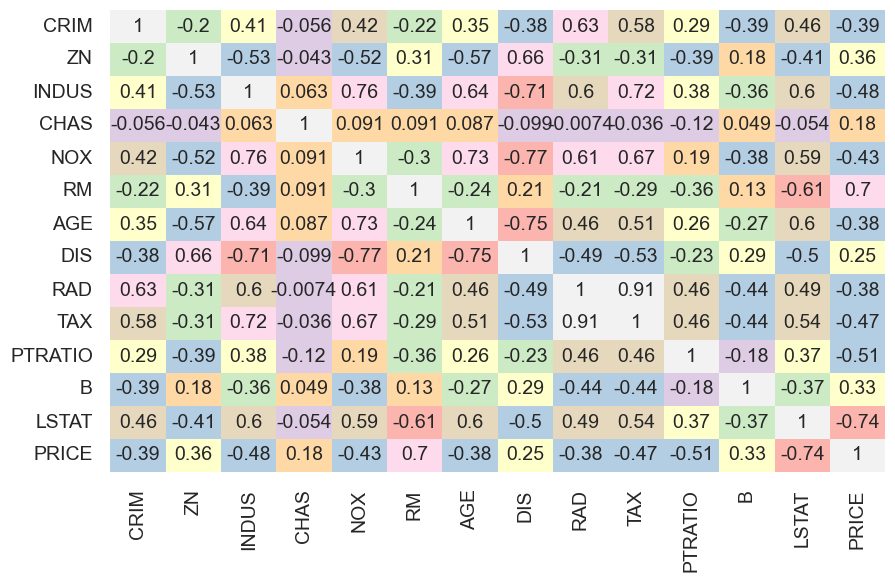

In [35]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(),
           cbar=False,
            annot=True,
           cmap='Pastel1',
           annot_kws={'size':14})
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

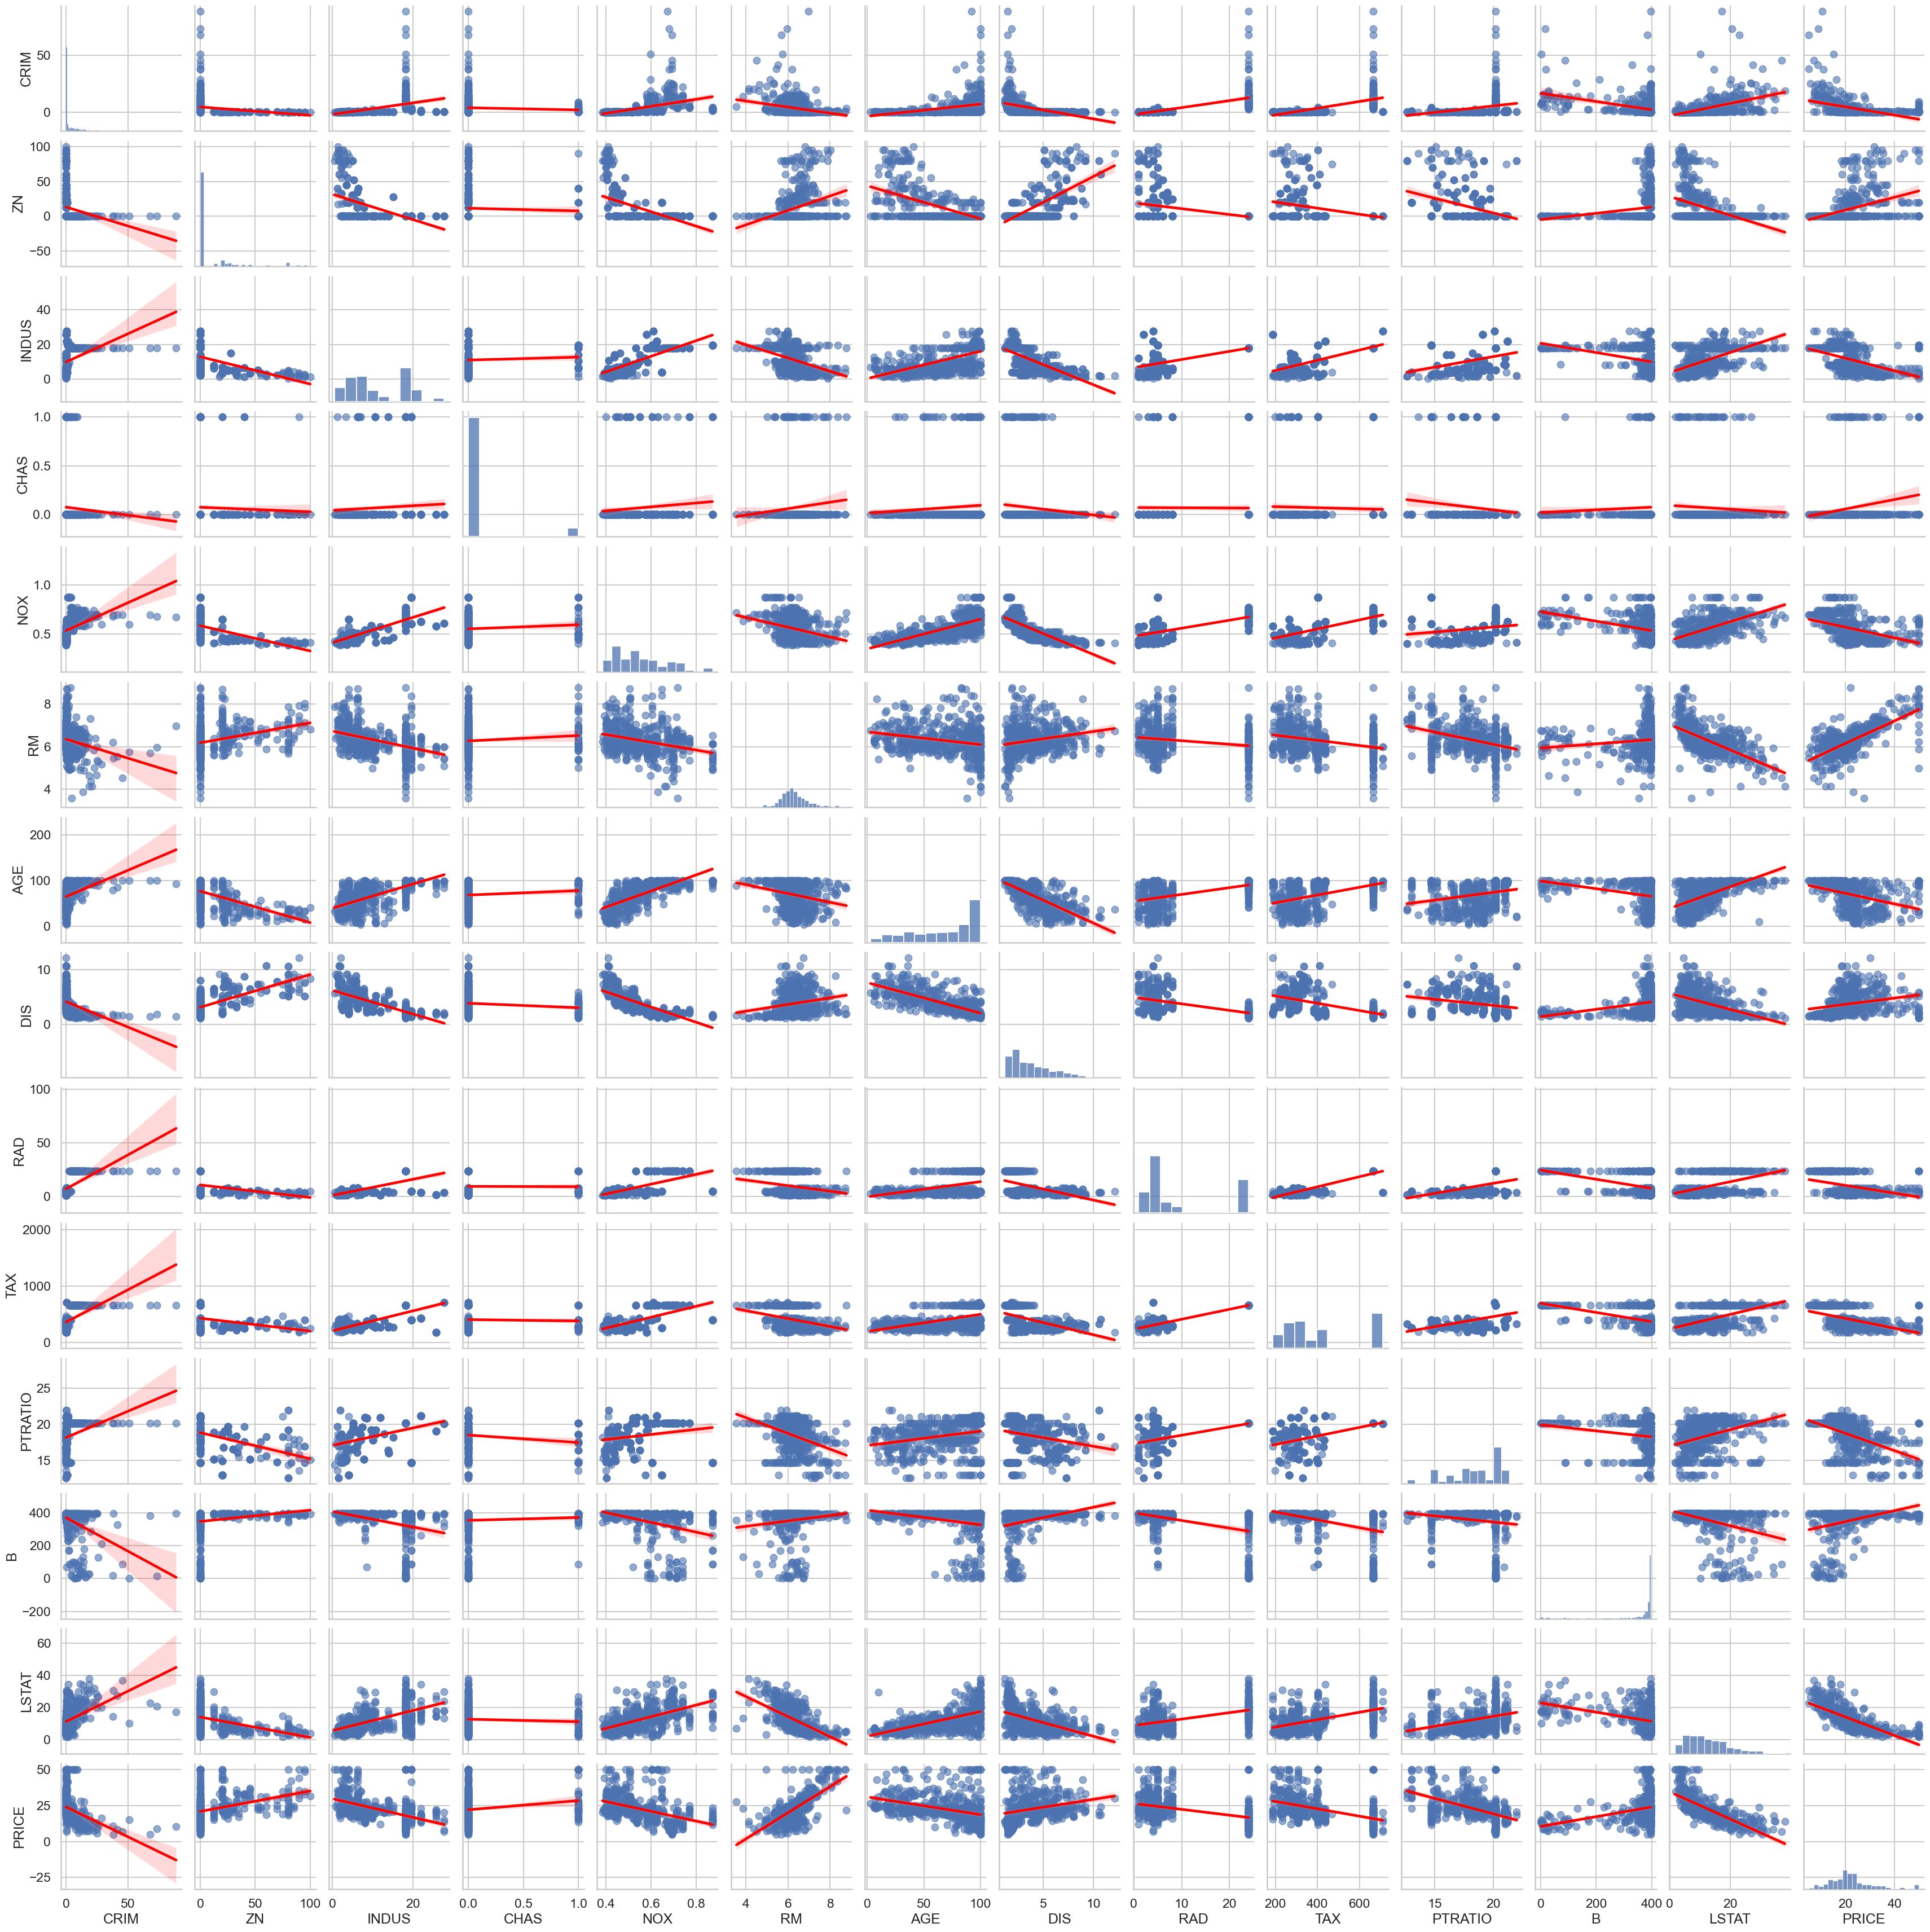

In [37]:
sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws':{'alpha':0.6}})

## Splitting Data

In [39]:
X = df.drop('PRICE', axis=1)
y = df.PRICE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=10)

## Modelling

In [41]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
print('Training R^2 Scores:', model.score(X_train, y_train))
print('Test R^2 Scores:', model.score(X_test, y_test))
print('Intercept:', model.intercept_)

Training R^2 Scores: 0.750121534530608
Test R^2 Scores: 0.6709339839115628
Intercept: 36.53305138282439


In [44]:
pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['coeff'])

,coeff
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


## Checking for Skewed Data

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


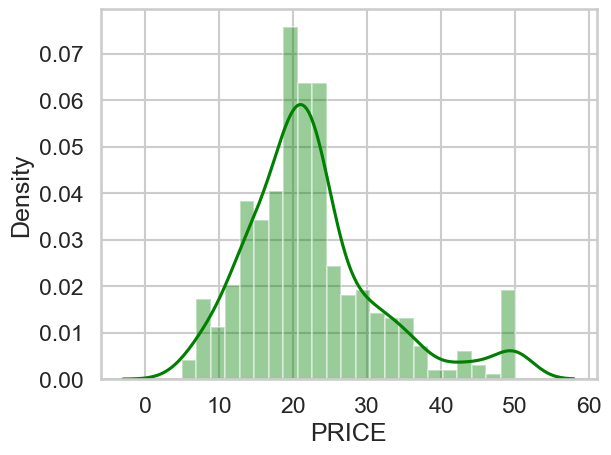

In [47]:
sns.distplot(df.PRICE, color='green');

In [48]:
df.PRICE.skew()

1.1080984082549072

In [49]:
np.log(df.PRICE).skew()

-0.33032129530987864

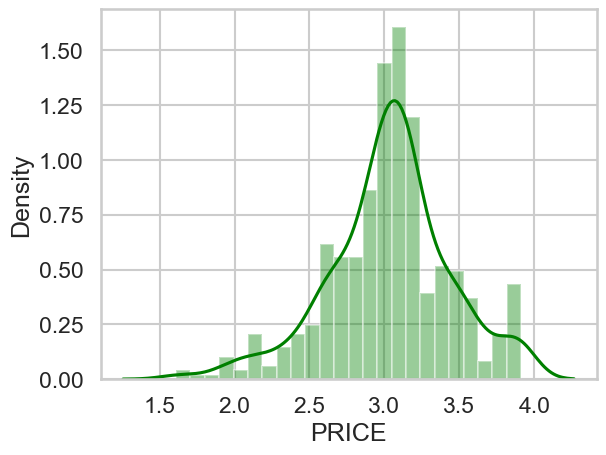

In [51]:
sns.distplot(np.log(df.PRICE), color='green');

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


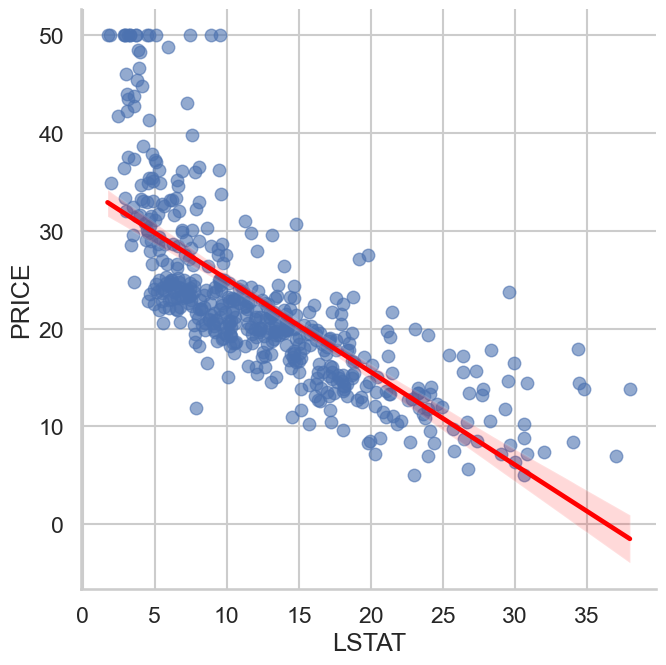

In [68]:
sns.lmplot(x='LSTAT', y='PRICE', data=df, line_kws={'color':'red'}, scatter_kws={'alpha':0.6}, size=7);

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


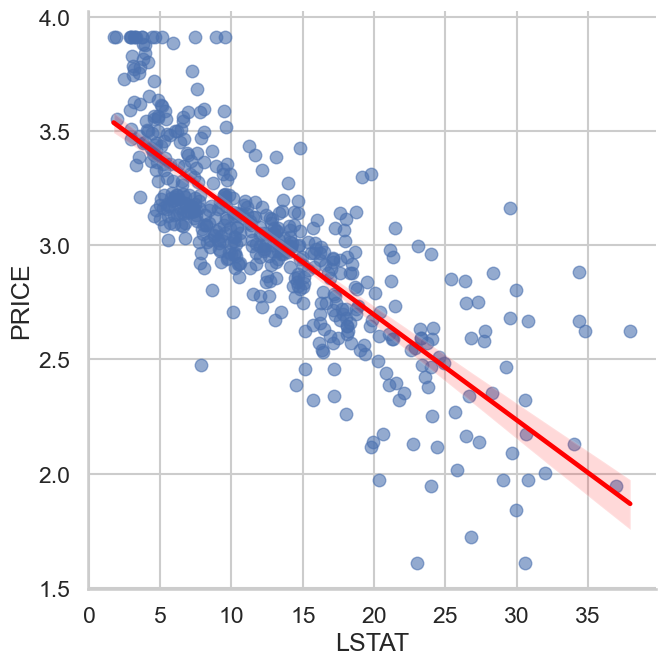

In [69]:
log_data = df
log_data.PRICE = np.log(df.PRICE)
sns.lmplot(x='LSTAT', y='PRICE', data=log_data, size=7, line_kws={'color':'red'}, scatter_kws={'alpha':0.6});

In [70]:
log_data.PRICE.skew()

-0.33032129530987864

## Modelling With Log Prices

In [74]:
X = df.drop('PRICE', axis=1)
y = np.log(df.PRICE)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

mdeol = LinearRegression()

model.fit(X_train, y_train)

print('Training R^2 Scores:', model.score(X_train, y_train))
print('Test R^2 Scores:', model.score(X_test, y_test))

print('Intercept:', model.intercept_)

pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['coef'])

Training R^2 Scores: 0.7770898789002231
Test R^2 Scores: 0.7602960879217207
Intercept: 1.4945811767055568


,coef
CRIM,-0.004525
ZN,0.000398
INDUS,0.001026
CHAS,0.026375
NOX,-0.231506
RM,0.016266
AGE,0.000323
DIS,-0.013656
RAD,0.005117
TAX,-0.000233
